In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
sns.set_theme(style="ticks")
%matplotlib notebook

In [2]:
path = r"C:\Users\parik\Documents\Data sets\Income Pyramids-20211206T143645Z-001\Income Pyramids\Member Incomes\member_income_20140131_MS_rev_csv\member_income_20140131_MS_rev.csv"
df = pd.read_csv(path)
df.head()

,HH_ID,MEM_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,MONTH,...,RELATION_WITH_HOH,STATE_OF_ORIGIN,RELIGION,CASTE,CASTE_CATEGORY,LITERACY,EDUCATION,NATURE_OF_OCCUPATION,INCOME_OF_MEMBER_FROM_ALL_SOURCES,INCOME_OF_MEMBER_FROM_WAGES
0,77051739,1,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,...,HOH,Jammu & Kashmir,Muslim,Other ST,ST,Y,Graduate,White collar worker,19000,19000
1,77051739,2,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,...,Son,Jammu & Kashmir,Muslim,Other ST,ST,Y,4th Std. Pass,Student,0,0
2,77051739,3,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
3,77051739,4,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,...,Daughter,Jammu & Kashmir,Muslim,Other ST,ST,Y,12th Std. Pass,Student,0,0
4,77051739,5,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,...,Daughter,Jammu & Kashmir,Muslim,Other ST,ST,Y,Graduate,Student,0,0


In [3]:
df.columns

Index(['HH_ID', 'MEM_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'STRATUM',
       'PSU_ID', 'MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS',
       'REASON_FOR_NON_RESPONSE', 'MEM_WEIGHT_MS', 'MEM_WEIGHT_FOR_COUNTRY_MS',
       'MEM_WEIGHT_FOR_STATE_MS', 'MEM_NON_RESPONSE_MS',
       'MEM_NON_RESPONSE_FOR_COUNTRY_MS', 'MEM_NON_RESPONSE_FOR_STATE_MS',
       'MEMBER_STATUS', 'GENDER', 'AGE_YRS', 'AGE_MTHS', 'RELATION_WITH_HOH',
       'STATE_OF_ORIGIN', 'RELIGION', 'CASTE', 'CASTE_CATEGORY', 'LITERACY',
       'EDUCATION', 'NATURE_OF_OCCUPATION',
       'INCOME_OF_MEMBER_FROM_ALL_SOURCES', 'INCOME_OF_MEMBER_FROM_WAGES'],
      dtype='object')

<IPython.core.display.Javascript object>


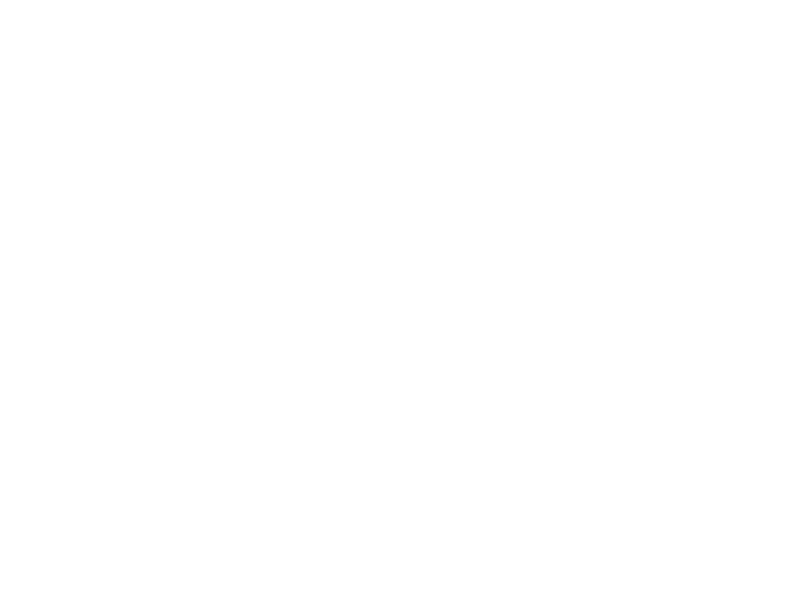

<IPython.core.display.Javascript object>


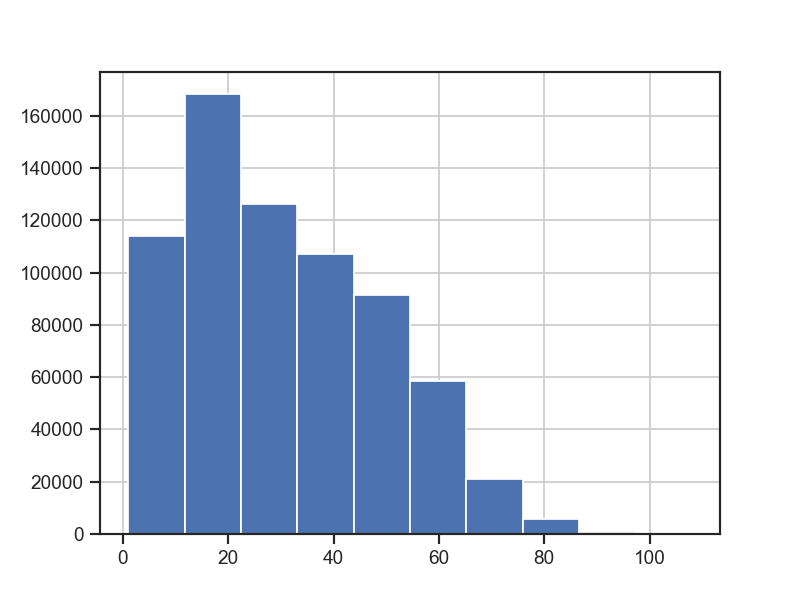

<AxesSubplot:>

In [4]:
plt.figure()
df2 = df[df['AGE_YRS']>0]
plt.figure()
df2['AGE_YRS'].hist()

In [5]:
caste_dist = df.groupby("CASTE").count()["HH_ID"]
pd.set_option('display.max_columns', None)
caste_dist = caste_dist[caste_dist>300].sort_values(ascending=False)[2:50]
labels = list(caste_dist.sort_values(ascending=False).index)
# caste_dist

<IPython.core.display.Javascript object>


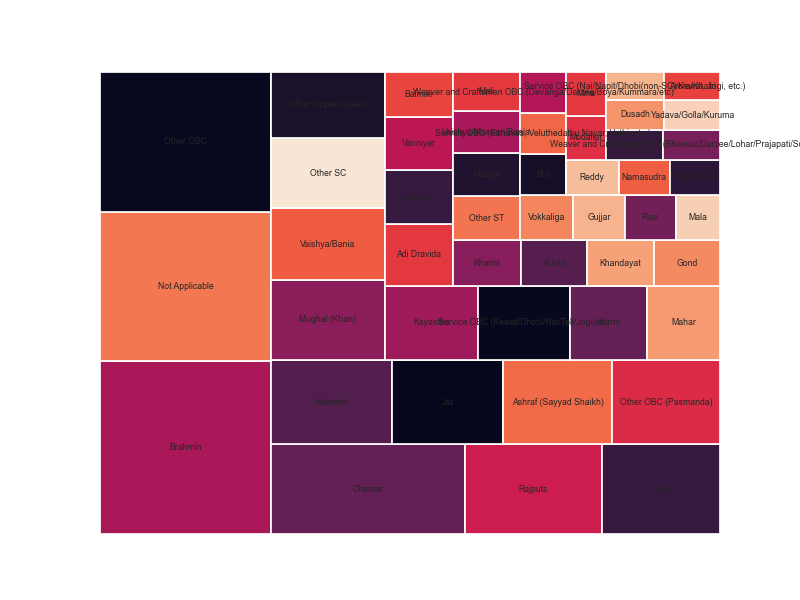

(0.0, 100.0, 0.0, 100.0)

In [6]:
plt.figure()
plt.rc('font', size=5)
squarify.plot(caste_dist,label = labels)
plt.axis('off')

In [7]:
df.columns

Index(['HH_ID', 'MEM_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'STRATUM',
       'PSU_ID', 'MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS',
       'REASON_FOR_NON_RESPONSE', 'MEM_WEIGHT_MS', 'MEM_WEIGHT_FOR_COUNTRY_MS',
       'MEM_WEIGHT_FOR_STATE_MS', 'MEM_NON_RESPONSE_MS',
       'MEM_NON_RESPONSE_FOR_COUNTRY_MS', 'MEM_NON_RESPONSE_FOR_STATE_MS',
       'MEMBER_STATUS', 'GENDER', 'AGE_YRS', 'AGE_MTHS', 'RELATION_WITH_HOH',
       'STATE_OF_ORIGIN', 'RELIGION', 'CASTE', 'CASTE_CATEGORY', 'LITERACY',
       'EDUCATION', 'NATURE_OF_OCCUPATION',
       'INCOME_OF_MEMBER_FROM_ALL_SOURCES', 'INCOME_OF_MEMBER_FROM_WAGES'],
      dtype='object')

In [8]:
print("Caste Categories: ",df['CASTE_CATEGORY'].unique())
print("Religion: ",df['RELIGION'].unique() )


Caste Categories:  ['ST' 'Not Applicable' 'OBC' 'Intermediate Caste' 'Upper Caste'
 'Not Stated' 'Data Not Available' 'SC']
Religion:  ['Muslim' 'Not Applicable' 'Data Not Available' 'Religion not stated'
 'Sikh' 'Hindu' 'Christian' 'Buddhist' 'Jain' 'Other Religion']


In [9]:
ed = list(df['EDUCATION'].unique())
years = [16,4,np.NaN, 12,11,8,5,3,18,0,10,2,1,7,9,6,14,np.NaN,21]
ed_years_dict = {}
for num in range(len(ed)):
    ed_years_dict[ed[num]]=years[num]

In [10]:
df[(df["AGE_YRS"]<10) & (df["AGE_YRS"]>=0)].shape

(89389, 32)

# Merging two datasets

In [11]:
df.columns

Index(['HH_ID', 'MEM_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'STRATUM',
       'PSU_ID', 'MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS',
       'REASON_FOR_NON_RESPONSE', 'MEM_WEIGHT_MS', 'MEM_WEIGHT_FOR_COUNTRY_MS',
       'MEM_WEIGHT_FOR_STATE_MS', 'MEM_NON_RESPONSE_MS',
       'MEM_NON_RESPONSE_FOR_COUNTRY_MS', 'MEM_NON_RESPONSE_FOR_STATE_MS',
       'MEMBER_STATUS', 'GENDER', 'AGE_YRS', 'AGE_MTHS', 'RELATION_WITH_HOH',
       'STATE_OF_ORIGIN', 'RELIGION', 'CASTE', 'CASTE_CATEGORY', 'LITERACY',
       'EDUCATION', 'NATURE_OF_OCCUPATION',
       'INCOME_OF_MEMBER_FROM_ALL_SOURCES', 'INCOME_OF_MEMBER_FROM_WAGES'],
      dtype='object')

In [12]:
path = r"C:\Users\parik\Documents\Data sets\Income Pyramids-20211206T143645Z-001\Income Pyramids\Member Incomes\member_income_20210228_MS_rev_csv\member_income_20210228_MS_rev.csv"
df_new = pd.read_csv(path)
df_new.head()

,HH_ID,MEM_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,MONTH,RESPONSE_STATUS,REASON_FOR_NON_RESPONSE,FAMILY_SHIFTED,MEM_WEIGHT_MS,MEM_WEIGHT_FOR_COUNTRY_MS,MEM_WEIGHT_FOR_STATE_MS,MEM_NON_RESPONSE_MS,MEM_NON_RESPONSE_FOR_COUNTRY_MS,MEM_NON_RESPONSE_FOR_STATE_MS,MEMBER_STATUS,REASON_FOR_EMIGRATION_IMMIGRATION,GENDER,AGE_YRS,AGE_MTHS,RELATION_WITH_HOH,MARITAL_STATUS,STATE_OF_ORIGIN,RELIGION,CASTE,CASTE_CATEGORY,LITERACY,EDUCATION,DISCIPLINE,NATURE_OF_OCCUPATION,INDUSTRY_OF_OCCUPATION,OCCUPATION,INCOME_OF_MEMBER_FROM_ALL_SOURCES,INCOME_OF_MEMBER_FROM_WAGES,INCOME_OF_MEMBER_FROM_PENSION,INCOME_OF_MEMBER_FROM_DIVIDEND,INCOME_OF_MEMBER_FROM_INTEREST,INCOME_OF_MEMBER_FROM_FD_PF_INSURANCE
0,77051739,1,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2021,Feb 2021,Accepted,No Failure,N,3127.144786,3127.144786,3127.144786,1.806601,1.806601,1.806601,Member of the household,Not Applicable,M,70,0,HOH,Married,Jammu & Kashmir,Muslim,Caste not stated,Not Stated,Y,12th Std. Pass,Arts,Retired/Aged,Not Applicable,Retired/Aged,18000,0,18000,0,0,0
1,77051739,2,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2021,Feb 2021,Accepted,No Failure,N,3127.144786,3127.144786,3127.144786,1.806601,1.806601,1.806601,Member of the household,Not Applicable,M,25,0,Son,Unmarried,Jammu & Kashmir,Muslim,Caste not stated,Not Stated,Y,Graduate,Arts,Student,Not Applicable,Students,0,0,0,0,0,0
2,77051739,4,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2021,Feb 2021,Accepted,No Failure,N,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Emigrated,Shifted to in-laws/new residence after marriage,Not Applicable,-100,-100,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0,0,0,0,0
3,77051739,5,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2021,Feb 2021,Accepted,No Failure,N,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Emigrated,Shifted to in-laws/new residence after marriage,Not Applicable,-100,-100,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0,0,0,0,0
4,77051739,6,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2021,Feb 2021,Accepted,No Failure,N,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Emigrated,Shifted to in-laws/new residence after marriage,Not Applicable,-100,-100,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0,0,0,0,0


In [13]:
df_new.columns

Index(['HH_ID', 'MEM_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'STRATUM',
       'PSU_ID', 'MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS',
       'REASON_FOR_NON_RESPONSE', 'FAMILY_SHIFTED', 'MEM_WEIGHT_MS',
       'MEM_WEIGHT_FOR_COUNTRY_MS', 'MEM_WEIGHT_FOR_STATE_MS',
       'MEM_NON_RESPONSE_MS', 'MEM_NON_RESPONSE_FOR_COUNTRY_MS',
       'MEM_NON_RESPONSE_FOR_STATE_MS', 'MEMBER_STATUS',
       'REASON_FOR_EMIGRATION_IMMIGRATION', 'GENDER', 'AGE_YRS', 'AGE_MTHS',
       'RELATION_WITH_HOH', 'MARITAL_STATUS', 'STATE_OF_ORIGIN', 'RELIGION',
       'CASTE', 'CASTE_CATEGORY', 'LITERACY', 'EDUCATION', 'DISCIPLINE',
       'NATURE_OF_OCCUPATION', 'INDUSTRY_OF_OCCUPATION', 'OCCUPATION',
       'INCOME_OF_MEMBER_FROM_ALL_SOURCES', 'INCOME_OF_MEMBER_FROM_WAGES',
       'INCOME_OF_MEMBER_FROM_PENSION', 'INCOME_OF_MEMBER_FROM_DIVIDEND',
       'INCOME_OF_MEMBER_FROM_INTEREST',
       'INCOME_OF_MEMBER_FROM_FD_PF_INSURANCE'],
      dtype='object')

<IPython.core.display.Javascript object>


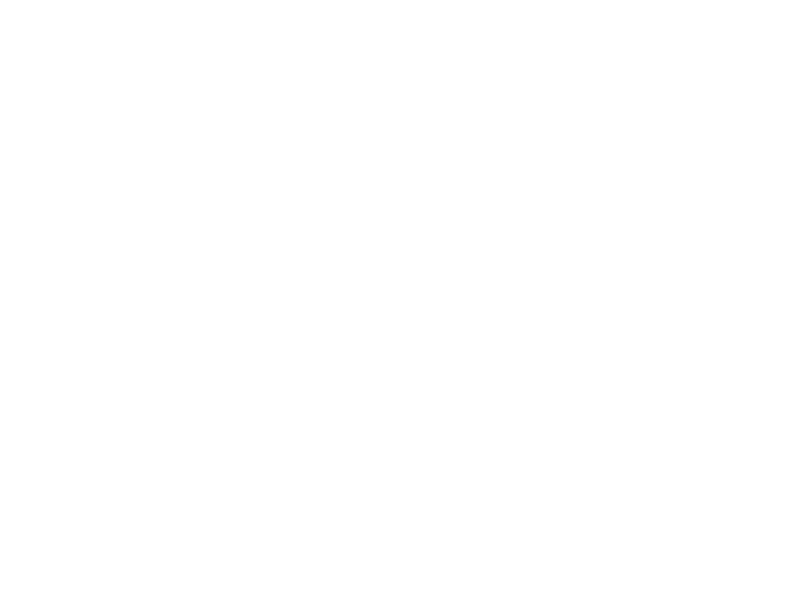

<IPython.core.display.Javascript object>


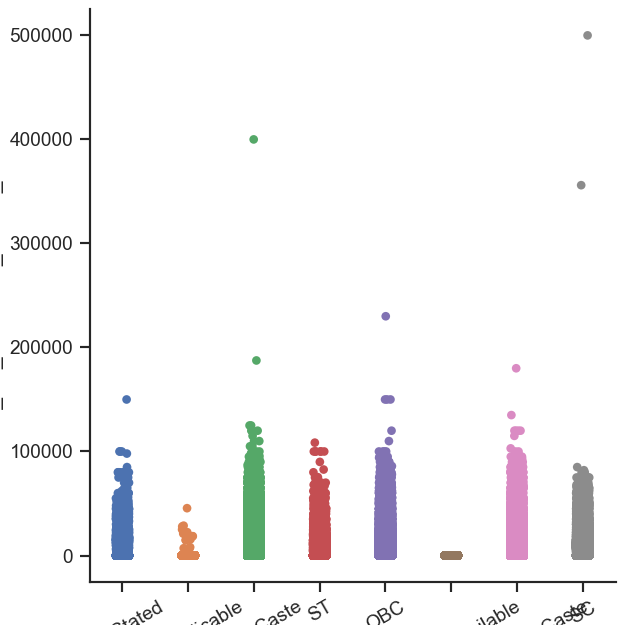

In [14]:
plt.figure()
g = sns.catplot(x="CASTE_CATEGORY", y="INCOME_OF_MEMBER_FROM_WAGES", data=df_new)
g.set_xticklabels(rotation=30)
# sns.set(rc={'figure.figsize':(30,30)})

In [18]:
df_new['CASTE_CATEGORY'].unique()

array(['Not Stated', 'Not Applicable', 'Upper Caste', 'ST', 'OBC',
       'Data Not Available', 'Intermediate Caste', 'SC'], dtype=object)

In [19]:
data = df_new.copy()

In [20]:
data.columns

Index(['HH_ID', 'MEM_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'STRATUM',
       'PSU_ID', 'MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS',
       'REASON_FOR_NON_RESPONSE', 'FAMILY_SHIFTED', 'MEM_WEIGHT_MS',
       'MEM_WEIGHT_FOR_COUNTRY_MS', 'MEM_WEIGHT_FOR_STATE_MS',
       'MEM_NON_RESPONSE_MS', 'MEM_NON_RESPONSE_FOR_COUNTRY_MS',
       'MEM_NON_RESPONSE_FOR_STATE_MS', 'MEMBER_STATUS',
       'REASON_FOR_EMIGRATION_IMMIGRATION', 'GENDER', 'AGE_YRS', 'AGE_MTHS',
       'RELATION_WITH_HOH', 'MARITAL_STATUS', 'STATE_OF_ORIGIN', 'RELIGION',
       'CASTE', 'CASTE_CATEGORY', 'LITERACY', 'EDUCATION', 'DISCIPLINE',
       'NATURE_OF_OCCUPATION', 'INDUSTRY_OF_OCCUPATION', 'OCCUPATION',
       'INCOME_OF_MEMBER_FROM_ALL_SOURCES', 'INCOME_OF_MEMBER_FROM_WAGES',
       'INCOME_OF_MEMBER_FROM_PENSION', 'INCOME_OF_MEMBER_FROM_DIVIDEND',
       'INCOME_OF_MEMBER_FROM_INTEREST',
       'INCOME_OF_MEMBER_FROM_FD_PF_INSURANCE'],
      dtype='object')

In [21]:
catcols = ['INDUSTRY_OF_OCCUPATION', 'OCCUPATION','MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS',
       'REASON_FOR_NON_RESPONSE', 'FAMILY_SHIFTED', 'MEMBER_STATUS',
       'REASON_FOR_EMIGRATION_IMMIGRATION', 'GENDER',
       'RELATION_WITH_HOH', 'MARITAL_STATUS', 'STATE_OF_ORIGIN', 'RELIGION',
       'CASTE', 'CASTE_CATEGORY', 'LITERACY', 'EDUCATION', 'DISCIPLINE',
       'NATURE_OF_OCCUPATION', 'INDUSTRY_OF_OCCUPATION', 'OCCUPATION',]

In [22]:
cols = [ 'AGE_YRS', 'AGE_MTHS','LITERACY', 'EDUCATION', 'DISCIPLINE',       
       'INCOME_OF_MEMBER_FROM_ALL_SOURCES', 'INCOME_OF_MEMBER_FROM_WAGES',
       'INCOME_OF_MEMBER_FROM_PENSION', 'INCOME_OF_MEMBER_FROM_DIVIDEND',
       'INCOME_OF_MEMBER_FROM_INTEREST',
       'INCOME_OF_MEMBER_FROM_FD_PF_INSURANCE']

In [23]:
data[catcols].describe()

,INDUSTRY_OF_OCCUPATION,OCCUPATION,MONTH_SLOT,MONTH,RESPONSE_STATUS,REASON_FOR_NON_RESPONSE,FAMILY_SHIFTED,MEMBER_STATUS,REASON_FOR_EMIGRATION_IMMIGRATION,GENDER,RELATION_WITH_HOH,MARITAL_STATUS,STATE_OF_ORIGIN,RELIGION,CASTE,CASTE_CATEGORY,LITERACY,EDUCATION,DISCIPLINE,NATURE_OF_OCCUPATION,INDUSTRY_OF_OCCUPATION,OCCUPATION
count,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214,871214
unique,39,208,4,1,2,7,3,5,24,4,18,6,36,11,403,8,4,18,29,23,39,208
top,Not Applicable,Data Not Available,Mar 2021,Feb 2021,Accepted,No Failure,N,Member of the household,Not Applicable,Data Not Available,Data Not Available,Data Not Available,Data Not Available,Hindu,Data Not Available,Data Not Available,Y,Data Not Available,Not Applicable,Data Not Available,Not Applicable,Data Not Available
freq,419850,322187,219709,871214,549027,549027,548403,674777,421120,322187,322187,322187,322187,352227,322187,322187,404679,322187,419512,322187,419850,322187


In [24]:
data['INDUSTRY_OF_OCCUPATION'].unique()

array(['Not Applicable', 'Education',
       'Automobiles and Other Transport Equipment Manufacturers',
       'Real Estate & Construction', 'Wholesale Trade',
       'Data Not Available', 'Defence Services', 'Financial Services',
       'Food Industries', 'Footwear and other Leather Industries',
       'Pharmaceutical Manufacturer', 'Health Care', 'Retail Trade',
       'Public Administrative Services', 'Utilities',
       'Plantation Crop Cultivation', 'Hotels and Restaurants',
       'Personal Non-Professional Services',
       'Personal Professional Services', 'Communication, Post & Courier',
       'Textile Industries', 'Metal Industries',
       'Machinery Manufacturers', 'Travel and Tourism',
       'Media and Publishing', 'Agriculture- allied activities',
       'Soaps, Detergents, Cosmetics, Toiletries', 'Chemical Industries',
       'Handicraft Industries', 'Crop Cultivation', 'IT & ITES',
       'Fruits and Vegetable Farming', 'Entertainment and Sports',
       'Cement, Tile

In [25]:
ites = data[data["INDUSTRY_OF_OCCUPATION"] == 'IT & ITES']
ites.groupby("CASTE_CATEGORY")["INCOME_OF_MEMBER_FROM_WAGES"].agg(["count",np.mean,np.median]).sort_values(by = "mean",ascending = False)

,count,mean,median
CASTE_CATEGORY,,,
Not Stated,20,48250.000000,47500
ST,11,44172.727273,45000
Intermediate Caste,153,40130.718954,37500
Upper Caste,282,34073.404255,35000
OBC,302,31032.781457,29750
SC,84,27377.380952,25000


In [26]:
plt.figure()
ax = sns.boxplot(x="CASTE_CATEGORY", y="INCOME_OF_MEMBER_FROM_WAGES", data=ites)

<IPython.core.display.Javascript object>

In [27]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [38]:
casteprop = data.groupby("CASTE_CATEGORY")["HH_ID"].agg("count")
casteprop['prop'] = casteprop/casteprop.sum()
casteprop['prop']

CASTE_CATEGORY
Data Not Available    0.369814
Intermediate Caste    0.046178
Not Applicable        0.144796
Not Stated            0.006330
OBC                   0.189153
SC                    0.103741
ST                    0.023830
Upper Caste           0.116157
Name: HH_ID, dtype: float64

Create an heirarchy of occupation based on average incomes and check caste distributions

In [25]:
occupation_heirarchy = data.groupby("INDUSTRY_OF_OCCUPATION")["INCOME_OF_MEMBER_FROM_WAGES"].agg([np.mean, np.std, np.median,
                     np.min, np.max, percentile(50), percentile(75)]).sort_values(by = "percentile_75",ascending=False)
occupation_heirarchy

,mean,std,median,amin,amax,percentile_50,percentile_75
INDUSTRY_OF_OCCUPATION,,,,,,,
Mines,42990.304878,21056.989565,50000,0,82650,50000,60000
Defence Services,35008.933333,21471.622397,38000,0,98000,38000,45550
Public Administrative Services,35741.354751,18199.224674,35000,0,187500,35000,45000
IT & ITES,33886.384977,21502.042700,32500,0,120000,32500,45000
Education,33343.805913,18019.072671,34500,0,150000,34500,45000
Financial Services,31035.670236,14573.991231,30000,0,90000,30000,42000
Utilities,24335.403026,14469.267460,25000,0,80000,25000,31425
Health Care,22659.484039,23211.078414,15750,0,500000,15750,30000
"Communication, Post & Courier",20212.178378,14855.019241,18000,0,75000,18000,30000
